In [23]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [24]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()
x_train.shape

(50000, 32, 32, 3)

In [25]:
x_test.shape

(10000, 32, 32, 3)

In [26]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [27]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [28]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [29]:
classes = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
classes[9]

'truck'

In [30]:
def plot_sample(x, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]])

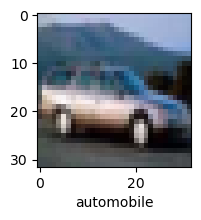

In [31]:
plot_sample(x_train, y_train, 4)

In [32]:
#NORMALISING
x_train = x_train / 255
x_test = x_test / 255

In [33]:
#Artifical Neural Network
ann = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000, activation = 'relu'),
    layers.Dense(1000, activation = 'relu'),
    layers.Dense(10, activation = 'sigmoid'),
])

ann.compile(optimizer='SGD',
            loss = 'sparse_categorical_crossentropy',
            metrics=['accuracy'])

ann.fit(x_train, y_train, epochs=5)

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 75s 40ms/step - accuracy: 0.3039 - loss: 1.9345
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 61s 39ms/step - accuracy: 0.4220 - loss: 1.6453
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 62s 40ms/step - accuracy: 0.4503 - loss: 1.5551
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 61s 39ms/step - accuracy: 0.4767 - loss: 1.4930
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 61s 39ms/step - accuracy: 0.4969 - loss: 1.4361


In [36]:
ann.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.4880 - loss: 1.4481


[1.4507310390472412, 0.48240000009536743]

<b>Very Low Accuracy with Artificial Neural Network</b>

In [37]:
cnn = models.Sequential([
    #cnn
    layers.Conv2D(filters=32, activation='relu', kernel_size=(3,3), input_shape=(32,32,3)),#no.of filters and filter size was chosen at random
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=32, activation='relu', kernel_size=(3,3), input_shape=(32,32,3)),#no.of filters and filter size was chosen at random
    layers.MaxPooling2D((2,2)),
    
    #dense
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

C:\Users\VidhuVikasSingh\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [41]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [44]:
cnn.fit(x_train, y_train, epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.7409 - loss: 0.7374
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.7492 - loss: 0.7198
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.7544 - loss: 0.7036
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.7649 - loss: 0.6740
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.7699 - loss: 0.6562
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.7784 - loss: 0.6326
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.7868 - loss: 0.6088
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.7884 - loss: 0.6008
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.8000 - loss: 0.5744
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.7988 - loss: 0.5699


In [45]:
cnn.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6883 - loss: 1.0011


[1.0103803873062134, 0.6865000128746033]

In [46]:
y_test[:5]

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)

In [47]:
y_test = y_test.reshape(-1,)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

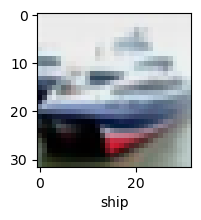

In [48]:
plot_sample(x_test, y_test, 1)

In [49]:
y_pred = cnn.predict(x_test)
y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


array([[6.82591199e-05, 1.32312844e-05, 6.18032718e-05, 9.77980494e-01,
        1.61287244e-04, 2.11006142e-02, 2.77021085e-04, 5.08040421e-06,
        3.23308544e-04, 8.95609082e-06],
       [4.61636955e-05, 9.85998392e-01, 2.77025194e-08, 1.34235840e-08,
        1.05923836e-09, 1.40842657e-10, 1.11257634e-08, 2.00954652e-11,
        1.29724005e-02, 9.83002363e-04],
       [2.67246906e-02, 1.25211611e-01, 7.29515625e-04, 1.67997775e-03,
        2.54216517e-04, 5.83279734e-06, 2.04026601e-05, 3.61733430e-04,
        8.11192393e-01, 3.38196345e-02],
       [8.69673789e-01, 5.86807510e-05, 1.06056191e-01, 1.46420047e-04,
        4.86571720e-04, 3.28472680e-07, 1.11976624e-06, 4.99778672e-08,
        2.35411245e-02, 3.57531717e-05],
       [1.63257397e-07, 3.14902427e-05, 5.66295872e-04, 6.21024426e-03,
        3.49858217e-02, 1.85240624e-05, 9.58182931e-01, 7.40220798e-07,
        3.41703549e-06, 3.28532423e-07]], dtype=float32)

In [50]:
np.argmax([5,12,1,2])#Gives the index of max number in the given array

1

In [51]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 1, 8, 0, 6]

In [52]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

Most is correct, only on index 1 is wrong

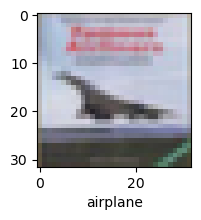

In [53]:
plot_sample(x_test, y_test, 3)

In [55]:
classes[y_classes[3]]#prediction

'airplane'